# Data Cleaning
### Why clean data?
The data that we receive and use is not perfect. Numerous factors such as data collection from multiple sources, or data corruption while storing or retrieving data, human errors in entering data, data loss while transferring data on some network, etc, can lead to incomplete, inconsistent, and incorrect data. If we use data as received in our analysis, then we will perform incorrect analysis and any conclusion drawn from the data will be wrong. Therefore, data cleaning is a necessary step before doing any analysis on the data.

Data cleaning or cleansing is the process of detecting and correcting inconsistent, incorrect, and extraneous data. Data cleaning involves dealing with

* Missing data
* Duplicated data
* Outliers in the data
* Extra data that might not be needed
* Inconsistent data
* Converting data into a standard


### Understanding Data types
![data type](https://i.ibb.co/g3k7pj7/image.png)



### Handling Missing Value

https://machinelearningmastery.com/handle-missing-data-python/


https://www.youtube.com/playlist?list=PLE-8p-CwnFPuOjFcbnXLFvSQaHFK3ymUW






### Handling Missing Values
Deleting Rows

Replacing With Mean/Median/Mode

Assigning An Unique Category

Predicting The Missing Values

Using Algorithms Which Support Missing Values



download the dataset
https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home

In [19]:
import pandas as pd
df=pd.read_csv(r"C:\Users\PIYUSH\Documents\melb_data.csv")

In [2]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

#### Score from Approach 1 
(Drop Columns with Missing Values)
Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [4]:
# Get names of columns with missing values
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

# Drop columns in training and validation data
reduced_df = df.drop(cols_with_missing, axis=1)

In [5]:
reduced_df.shape

(13580, 17)

In [6]:
df.shape

(13580, 21)

Droping the rows having missing values

In [7]:
new_df=df.dropna()

In [8]:
new_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [9]:
new_df.shape

(6196, 21)

In [10]:
df.shape

(13580, 21)

#### Filling missing values

In [20]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [22]:
df['BuildingArea'].head()

0      NaN
1     79.0
2    150.0
3      NaN
4    142.0
Name: BuildingArea, dtype: float64

In [24]:
df['BuildingArea'].fillna(df['BuildingArea'].median(),inplace=True)

In [25]:
df['BuildingArea'].isnull().sum()

0

In [28]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

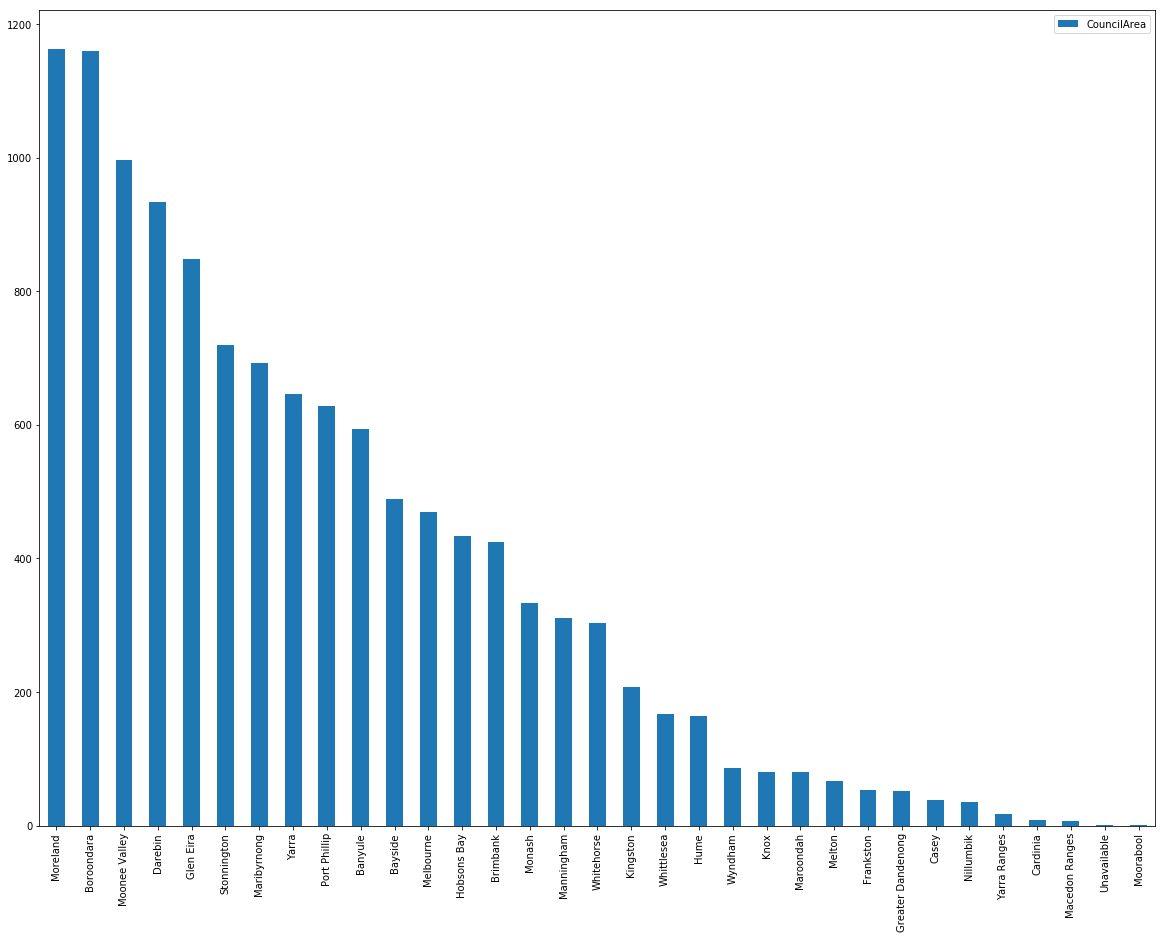

In [34]:
cnt=df['CouncilArea'].value_counts().to_frame()
cnt.plot(kind='bar',figsize=(20,15))

In [35]:
cnt

,CouncilArea
Moreland,1163
Boroondara,1160
Moonee Valley,997
Darebin,934
Glen Eira,848
Stonnington,719
Maribyrnong,692
Yarra,647
Port Phillip,628
Banyule,594


In [36]:
df['CouncilArea'].fillna('Moreland',inplace=True)
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Handling incosistent data

### Handling Outlier
#### What are outliers?

Outliers are observations that are significantly distant from other observations. These do not follow the general trend of the data. Outliers can indicate variation or error in the data. Outliers in a single variable/column are called univariate while outliers in multiple variables/columns are called multivariate.

#### **Sources of outliers**

Outliers can be caused by a variety of reasons. Some common ones are:

Errors in entering data.

Errors in measuring data, e.g., errors in the measuring instrument.
Errors in collecting and merging data from multiple sources.
Errors in processing data.
Natural variance because of some unknown reason.
#### **Types of outliers**

Outliers can be classified into three broad categories:

1. Point or Global outliers #
These are observations that deviate from all of the other observations, e.g., if the temperature is recorded as 100 degrees Celsius, or a person who usually spends $100 in a week spends $500 this week.

![alt text](https://i.ibb.co/8jwDx6N/image.png)

2. Contextual or Conditional outliers #
These are data points that are not outliers globally, but are outliers in their own context. If we look at a subset of the data, then we are looking in a context.
For instance, a sudden unusual temperature drop in the summer season is considered a contextual outlier where the context is the summer season.
Another example could be if the price of a good is $15 and its price falls below $10 during the Christmas period. If its price falls below $10 in July, then that would be a contextual outlier with the month of July being the context.

3. Collective outliers 
These are a group of observations that are outliers globally from the rest of the observations but are not outliers within the group. An example could be a sudden increase in stock transactions of a particular company during a month or unusual delays in shipping orders over a period of three days.


![alt text](https://i.ibb.co/xmpVc7D/image.png)



### Detecting Outlier

Outlier detection
* Box plots and Quantile ranges
* Scatter plots
* Z - Score

https://medium.com/@swethalakshmanan14/outlier-detection-and-treatment-a-beginners-guide-c44af0699754

outlier detection playlist

https://www.youtube.com/playlist?list=PLeo1K3hjS3ut5olrDIeVXk9N3Q7mKhDxO

Github Link

https://github.com/codebasics/py/tree/master/ML/FeatureEngineering

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\PIYUSH\Documents\weight-height.csv")
df.sample(5)

,Gender,Height,Weight
836,Male,68.171533,199.701811
694,Male,70.144874,190.585377
3351,Male,70.013780,184.374504
4014,Male,70.048667,204.779499
6229,Female,60.124167,119.057425


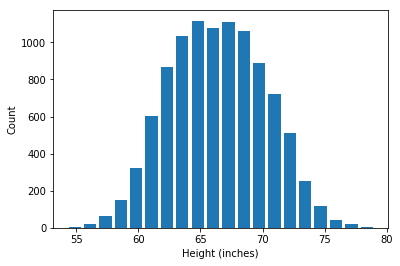

In [7]:

plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Plot bell curve along with histogram for our dataset

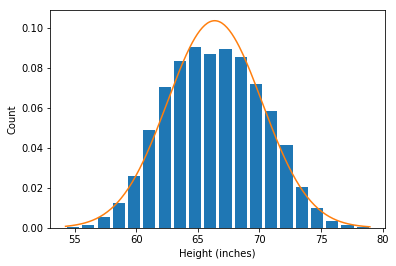

In [12]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [14]:
df.Height.mean()

66.36755975482124

In [16]:
df.Height.std()

3.847528120773229


Here the mean is 66.37 and standard deviation is 3.84.

(1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [18]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714093

In [25]:
lower_limit = df.Height.mean() -3*df.Height.std()
lower_limit

54.82497539250156

Here are the outliers that are beyond 3 std dev from mean

In [26]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127



Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

Now remove these outliers and generate new dataframe

In [28]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [29]:
df_no_outlier_std_dev.shape

(9993, 3)

In [30]:
df.shape

(10000, 3)


(2) Outlier detection and removal using Z Score
Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

z=(x-mean)/std

In [31]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [32]:
(73.84-66.37)/3.84

1.9453124999999998


Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [33]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [34]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


Here is the list of all outliers

In [36]:
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027



Remove the outliers and produce new dataframe

In [37]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [38]:
df_no_outliers.shape

(9993, 4)

In [39]:
df.shape

(10000, 4)


Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

## Standardisation,Normalisation and Encoding

### Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.

For example, assume your input dataset contains one column with values ranging from 0 to 1, and another column with values ranging from 10,000 to 100,000. The great difference in the scale of the numbers could cause problems when you attempt to combine the values as features during modeling.

Normalization avoids these problems by creating new values that maintain the general distribution and ratios in the source data, while keeping values within a scale applied across all numeric columns used in the model.


### Standardization
Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.


### Standardization Vs Normalization

https://www.youtube.com/watch?v=mnKm3YP56PY


### Encoding
Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded.

Need to be discussed 
* One Hot encoding
* label Encoding


https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02